In [168]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from tqdm import tqdm
import pandas as pd

## Tarea 5: Molécula de Hidrógeno H2 una versión del método variacional

a) Usando el algoritmo de Metropolis en coordenadas cartesianas, hacer el muestreo del cuadrado de la función de onda fijando L = 2 y N = $10^5$ pasos en la cadena 

  0%|          | 0/100000 [00:00<?, ?it/s]

100%|██████████| 100000/100000 [00:04<00:00, 20033.27it/s]


Posiciones guardadas: 100000 para cada pepa


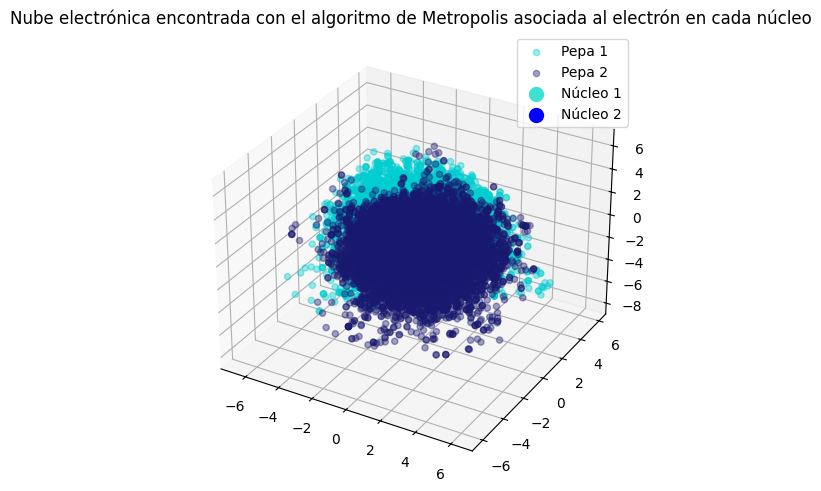

In [178]:
#Definición de las cosas
L = 2.0
N_steps = 100000

#Posicion de las pepas
R1 = np.array([0.0, 0.0, L/2])
R2 = np.array([0.0, 0.0, -L/2])
#Posicion inicial de las pepas
r1 = R1.copy()
r2 = R2.copy()
position1 = []
position2 = []

# Metropolis
def metropolis(r, R):
    r_new = r + (2*np.random.rand(3)-1) #vector random
    current_dist = np.linalg.norm(r - R)
    new_dist = np.linalg.norm(r_new - R)
    p = np.exp(- 2*(new_dist - current_dist))

    if np.random.rand() < p:
        return r_new
    else:
        return r


for step in tqdm(range(N_steps)):
    #Mover pepa 1
    r1 = metropolis(r1, R1)
    #Mover pepa 2  
    r2 = metropolis(r2, R2)
    
    #Guardar posicion de las pepas pero cada 5 pasos 
    if step >= step:
        position1.append(r1.copy())
        position2.append(r2.copy())

position1 = np.array(position1)
position2 = np.array(position2)

print(f"Posiciones guardadas: {len(position1)} para cada pepa")

#Gráfico
fig = plt.figure(figsize=(15, 5))

# Ambas nubes juntas
ax3 = fig.add_subplot(projection='3d')
ax3.scatter(position1[:,0], position1[:,1], position1[:,2], c='darkturquoise',alpha=0.4, label=rf'Pepa 1')
ax3.scatter(position2[:,0], position2[:,1], position2[:,2],c='midnightblue', alpha=0.4,label=rf'Pepa 2')
ax3.scatter([R1[0]], [R1[1]], [R1[2]], c='turquoise', s=100, label='Núcleo 1')
ax3.scatter([R2[0]], [R2[1]], [R2[2]], c='blue', s=100, label='Núcleo 2')

ax3.set_title('Nube electrónica encontrada con el algoritmo de Metropolis asociada al electrón en cada núcleo')
ax3.legend(loc='best')

plt.tight_layout()

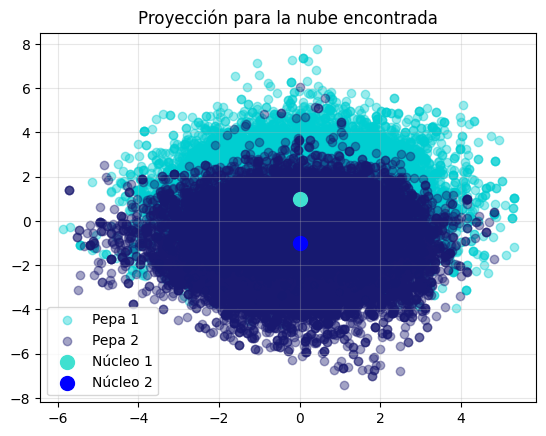

In [170]:
#Proyeccion 2D 
plt.scatter(position1[:, 0], position1[:, 2], c='darkturquoise',alpha=0.4, label=rf'Pepa 1')
plt.scatter(position2[:, 0], position2[:, 2],c='midnightblue', alpha=0.4,label=rf'Pepa 2')
plt.scatter([R1[0]], [R1[2]], c='turquoise', s=100, label='Núcleo 1')
plt.scatter([R2[0]], [R2[2]], c='blue', s=100, label='Núcleo 2')
plt.title('Proyección para la nube encontrada')
plt.legend()

plt.grid(True, alpha=0.3)
plt.show()

In [171]:
distances1 = np.linalg.norm(position1 - R1, axis=1)
distances2 = np.linalg.norm(position2 - R2, axis=1)

print(f"Distancia promedio de la pepa 1 al núcleo: {np.mean(distances1)}")
print(f"Distancia promedio de la pepa 2 al núcleo: {np.mean(distances2)}")

Distancia promedio de la pepa 1 al núcleo: 1.5334123582784387
Distancia promedio de la pepa 2 al núcleo: 1.5031705017198607


b) Calcule el valor esperado de la energía potencial para el siguientes separaciones nucleares l = np.linspace(1.0,3.0,10).

In [172]:
def Potential(r1, r2, R1, R2, L):
        r12 = np.linalg.norm(r1 - r2)
        r1R1 = np.linalg.norm(r1 - R1)
        r1R2 = np.linalg.norm(r1 - R2)
        r2R1 = np.linalg.norm(r2 - R1)
        r2R2 = np.linalg.norm(r2 - R2)
        term1 = 1.0 / r12 if r12>0 else 0.0
        term2 = 1.0 / L
        term3 = -1.0/r1R1 if r1R1>0 else 0.0
        term4 = -1.0/r1R2 if r1R2>0 else 0.0
        term5 = -1.0/r2R1 if r2R1>0 else 0.0
        term6 = -1.0/r2R2 if r2R2>0 else 0.0
        
        return term1 + term2 + term3 + term4 + term5 + term6 

def PotentialEnergy(l,N_steps):
    #Iniiciar pepas de nuevo
    R1 = np.array([0.0, 0.0, L/2])
    R2 = np.array([0.0, 0.0, -L/2])
    r1 = R1.copy()
    r2 = R2.copy()
    #Praa guardar la U
    U = []

    for step in range(N_steps):
        #Muevo pepas
        r1 = metropolis(r1, R1)
        r2 = metropolis(r2, R2)
        
        if step >= step %10 ==0:
            U_value = Potential(r1, r2, R1, R2, l)
            U.append(U_value)
    
    return U

# Calcular para diferentes separaciones L
l = np.linspace(1.0,3.0,10)
U_val = []

for L in tqdm(l):
    U_val.append(np.mean(PotentialEnergy(L,10000)))


100%|██████████| 10/10 [00:04<00:00,  2.18it/s]


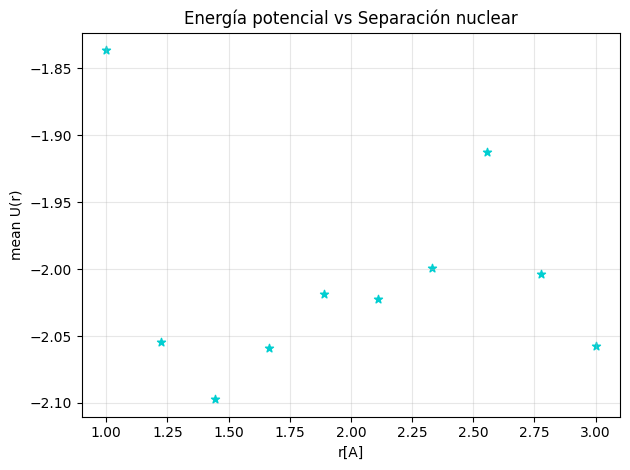

In [173]:
# Graficar resultados
plt.scatter(l, U_val, marker='*',color='darkturquoise')
plt.xlabel('r[A]')
plt.ylabel('mean U(r)')
plt.title('Energía potencial vs Separación nuclear')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [174]:
print(f"\nSeparación de equilibrio {l[np.argmin(U_val)]}")
print(f"Energía mínima {np.min(U_val)}")


Separación de equilibrio 1.4444444444444444
Energía mínima -2.0972511929782143


c) Incluya el efecto de Heitler y London (buscar el sentido físico):

El sentido físico es no asumir que la función de onda es simétrica, se liga la parte antisimétrica e impar con respecto al intercambio de las coordenadas espaciales de los electrones y su parte simétrica al revés. Así, puede verse el modelo de un enlace covalente. Con la nueva suma de dos funciones de onda la probabilidad de encontrar el núcleo es más alta. Además, como el electrón experimenta la fuerza atractiva (junto con la del núcleo), se puede notar una reducción de la energía potencial.

In [175]:
def psi_hl(r1, r2):
        return (1/np.pi)*(np.exp(-2*( np.linalg.norm(r1 - R1) +  np.linalg.norm(r2 - R2))) + np.exp(-2*(np.linalg.norm(r2 - R1) + np.linalg.norm(r1 - R2))))

def metropolisBig(r1,r2):
    r1_new = r1 + (2*np.random.rand(3) - 1)
    r2_new = r2 + (2*np.random.rand(3) - 1)
    
    current_prob = psi_hl(r1, r2)
    new_prob = psi_hl(r1_new,r2_new)
    p = (current_prob/new_prob)**2
        
    if np.random.rand() < p:
        return r1_new, r2_new
    
    else:
        return r1, r2

def Heitlerlondon(L, N_steps):
    #Pepas
    R1 = np.array([0.0, 0.0, L/2])
    R2 = np.array([0.0, 0.0, -L/2])
        
    r1 = R1.copy()
    r2 = R2.copy()

    U_values = []
    
    for step in tqdm(range(N_steps)):
        #Muevo ambas pepas al timepo
        r1_new, r2_new = metropolisBig(r1, r2)
     
        if step >=step % 10 == 0:  
            U = Potential(r1_new, r2_new, R1, R2, L)
            U_values.append(U)
    
    U_mean = np.mean(U_values)

    return U_mean

l = np.linspace(1.0, 3.0, 10)  
hl = []
      
for L in l:
    hl.append(Heitlerlondon(L,10000))

100%|██████████| 10000/10000 [00:00<00:00, 15019.32it/s]


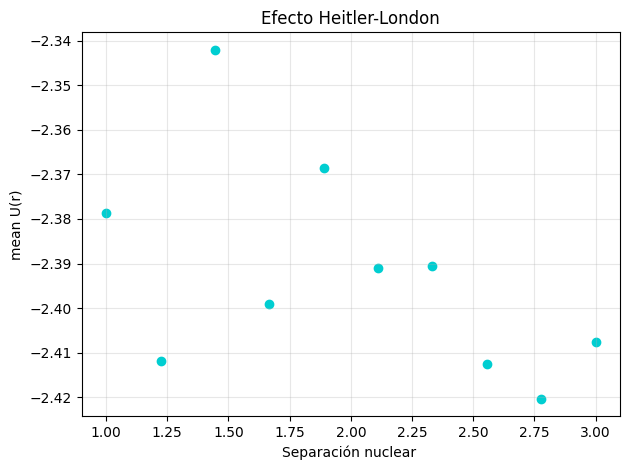

In [176]:
plt.scatter(l, hl, color='darkturquoise')
plt.xlabel('Separación nuclear ')
plt.ylabel('mean U(r)')
plt.title('Efecto Heitler-London')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [177]:
print(f"\nSeparación de equilibrio {l[np.argmin(hl)]}")
print(f"Energía mínima {np.min(hl)}")


Separación de equilibrio 2.7777777777777777
Energía mínima -2.4203280939361744
